In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-fac.csv',sep=';')
data2=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-fou.csv',sep=';')
data3=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-kar.csv',sep=';')
data4=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-mor.csv',sep=';')
data5=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-pix.csv',sep=';')
data6=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-zer.csv',sep=';')

In [ ]:
data1.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 216 entries, fac1 to fac216
dtypes: int64(216)
memory usage: 3.3 MB


In [ ]:
true_label=np.zeros(2000,dtype=int)
p=0
for i in range(0,2000,200):
  true_label[i:i+200]+=p
  p+=1
print(true_label)

[0 0 0 ... 9 9 9]


In [ ]:
data6.head(9)#=data1.columns

,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,zer10,zer11,zer12,zer13,zer14,zer15,zer16,zer17,zer18,zer19,zer20,zer21,zer22,zer23,zer24,zer25,zer26,zer27,zer28,zer29,zer30,zer31,zer32,zer33,zer34,zer35,zer36,zer37,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,20.043415,110.868301,99.025277,0.100592,4.465825,37.203673,71.682698,303.833008,444.818734,0.324292,2.808212,7.505539,14.199325,109.820532,0.623083,11.902597,13.992883,6.972559,484.784871,0.344745,6.836616,41.172862,67.583218,1.875599,2.280403,170.265764,158.818410,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,65.596013,97.691050,87.946417,0.136957,3.005241,22.837229,40.656873,186.411684,419.543064,0.054929,3.576323,38.546889,100.034785,85.145611,0.414205,8.006745,53.191399,91.367313,371.994407,0.531269,14.376516,74.169044,82.063449,1.348741,29.158736,211.200298,34.597257,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,33.481501,51.705886,17.760377,0.138112,2.376392,20.892105,68.666675,168.420731,518.229961,0.113119,3.380604,21.119272,52.675563,11.774172,0.328196,7.781216,71.369955,94.039942,402.482819,0.482565,8.101806,40.012973,14.869455,1.336517,35.772897,207.147093,10.924662,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,36.079443,49.978731,55.037174,0.190329,5.212415,25.128272,51.937089,178.923865,386.324218,0.245137,3.963072,20.036877,27.570634,80.054547,0.692839,8.226120,61.257439,112.688600,324.849754,0.583625,7.453045,23.667204,65.148691,1.326251,31.813000,239.672998,21.054749,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,27.169266,67.849862,71.512437,0.076843,2.660718,24.901428,61.750370,216.615177,417.658858,0.144952,3.055750,12.775389,47.312230,66.377015,0.384703,9.695486,75.963320,86.050213,399.975218,0.452419,4.055963,23.946695,50.192029,1.721486,40.003794,222.227638,83.421886,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513
5,0.229780,5.042077,40.442847,142.718378,120.586600,238.713474,193.363034,0.031558,0.754167,6.689360,20.087926,27.273738,58.455365,0.652346,13.046225,93.324245,226.663846,58.288896,194.704583,0.087589,1.842764,12.407290,12.568673,41.942019,1.961769,35.853147,197.378923,192.069988,129.513851,0.252242,4.592906,18.298133,90.172508,6.382364,96.349377,309.835456,120.751623,0.808418,10.570782,97.581195,21.335305,222.957245,451.432607,2.592809,64.448681,67.431997,555.304332
6,0.068383,0.929085,29.995907,120.285912,149.906770,556.821636,66.873006,0.049044,2.232918,14.963066,3.818094,15.193588,82.261748,0.113185,8.696983,64.394320,60.335791,357.537147,322.556252,0.292321,4.469912,5.927652,42.142809,29.305051,1.208892,21.796423,17.188437,27.757010,448.400796,0.651712,3.484489,47.040682,5.603168,3.563913,7.819361,194.891213,197.237818,0.787812,27.689348,6.637128,2.110440,172.713737,273.186742,7.144262,10.642549,55.283107,511.194536
7,0.029408,0.608213,3.954453,15.007775,107.223791,471.335713,247.380454,0.044699,1.318604,5.490533,22.614370,17.757290,21.512162,0.070617,0.914350,2.702571,27.185892,240.297649,508.826905,0.156483,1.736355,19.955005,30.846547,24.550581,0.106852,1.762550,49.846426,70.581004,532.067846,0.273774,8.938699,43.906064,12.386746,0.431665,29.776679,227.071648,186.391625,1.775261,26.604415,11.409401,7.062444,175.498979,301.078023,6.839167,15.515805,53.551123,512.603587
8

In [ ]:
print(data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape)

(2000, 216) (2000, 76) (2000, 64) (2000, 6) (2000, 240) (2000, 47)


In [ ]:
frames = [data1, data2,data3,data4,data5,data6]
  
result = pd.concat(frames,axis=1,join='inner')

In [ ]:
result.head()

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,fac11,fac12,fac13,fac14,fac15,fac16,fac17,fac18,fac19,fac20,fac21,fac22,fac23,fac24,fac25,fac26,fac27,fac28,fac29,fac30,fac31,fac32,fac33,fac34,fac35,fac36,fac37,fac38,fac39,fac40,...,zer8,zer9,zer10,zer11,zer12,zer13,zer14,zer15,zer16,zer17,zer18,zer19,zer20,zer21,zer22,zer23,zer24,zer25,zer26,zer27,zer28,zer29,zer30,zer31,zer32,zer33,zer34,zer35,zer36,zer37,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47
0,98,236,531,673,607,647,2,9,3,6,8,5,225,517,652,624,628,994,7,22,28,13,10,19,305,481,667,663,1009,727,38,28,18,11,20,10,287,567,651,742,...,0.122135,2.601646,11.472709,20.043415,110.868301,99.025277,0.100592,4.465825,37.203673,71.682698,303.833008,444.818734,0.324292,2.808212,7.505539,14.199325,109.820532,0.623083,11.902597,13.992883,6.972559,484.784871,0.344745,6.836616,41.172862,67.583218,1.875599,2.280403,170.265764,158.818410,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,3,7,214,514,690,548,630,1006,2,18,31,15,5,15,260,344,655,605,993,743,29,32,25,11,17,6,308,412,719,700,...,0.033657,0.390566,11.700830,65.596013,97.691050,87.946417,0.136957,3.005241,22.837229,40.656873,186.411684,419.543064,0.054929,3.576323,38.546889,100.034785,85.145611,0.414205,8.006745,53.191399,91.367313,371.994407,0.531269,14.376516,74.169044,82.063449,1.348741,29.158736,211.200298,34.597257,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,5,4,196,404,611,560,594,986,7,21,28,14,7,12,278,406,670,579,991,703,24,29,18,12,19,9,378,468,668,654,...,0.041733,0.937399,11.629045,33.481501,51.705886,17.760377,0.138112,2.376392,20.892105,68.666675,168.420731,518.229961,0.113119,3.380604,21.119272,52.675563,11.774172,0.328196,7.781216,71.369955,94.039942,402.482819,0.482565,8.101806,40.012973,14.869455,1.336517,35.772897,207.147093,10.924662,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,3,5,201,445,664,629,626,945,5,21,27,16,7,9,273,397,703,662,987,710,36,29,21,8,15,10,331,459,731,765,...,0.073624,1.973268,13.057108,36.079443,49.978731,55.037174,0.190329,5.212415,25.128272,51.937089,178.923865,386.324218,0.245137,3.963072,20.036877,27.570634,80.054547,0.692839,8.226120,61.257439,112.688600,324.849754,0.583625,7.453045,23.667204,65.148691,1.326251,31.813000,239.672998,21.054749,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,5,5,212,386,740,613,614,997,5,21,30,11,7,17,248,390,703,662,949,744,28,29,20,13,19,10,244,468,797,743,...,0.046477,1.117292,10.012169,27.169266,67.849862,71.512437,0.076843,2.660718,24.901428,61.750370,216.615177,417.658858,0.144952,3.055750,12.775389,47.312230,66.377015,0.384703,9.695486,75.963320,86.050213,399.975218,0.452419,4.055963,23.946695,50.192029,1.721486,40.003794,222.227638,83.421886,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
scaler = preprocessing.StandardScaler()
#scaler=preprocessing.scale()

In [ ]:
# Fit your data on the scaler object
scaled_data1 = scaler.fit_transform(data1)
scaled_data1 = pd.DataFrame(scaled_data1, columns=data1.columns)


scaled_data2 = scaler.fit_transform(data2)
scaled_data2 = pd.DataFrame(scaled_data2, columns=data2.columns)


scaled_data3 = scaler.fit_transform(data3)
scaled_data3 = pd.DataFrame(scaled_data3, columns=data3.columns)

scaled_data4 = scaler.fit_transform(data4)
scaled_data4 = pd.DataFrame(scaled_data4, columns=data4.columns)

scaled_data5 = scaler.fit_transform(data5)
scaled_data5 = pd.DataFrame(scaled_data5, columns=data5.columns)

scaled_data6 = scaler.fit_transform(data6)
scaled_data6 = pd.DataFrame(scaled_data6, columns=data6.columns)


In [ ]:
print(scaled_data1.shape,scaled_data2.shape,scaled_data3.shape,scaled_data4.shape,scaled_data5.shape,scaled_data6.shape)

(2000, 216) (2000, 76) (2000, 64) (2000, 6) (2000, 240) (2000, 47)


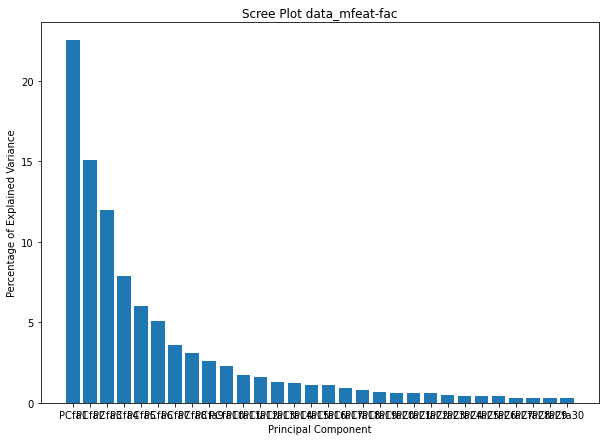

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data1)
pca_data1=pca.transform(scaled_data1)
pca_data1=pd.DataFrame(pca_data1, columns=['PCfa_'+str(i) for i in range(pca_data1.shape[1])])
per_var_data1=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCfa'+str(x) for x in range(1,len(per_var_data1)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data1)+1),height=per_var_data1, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-fac')
plt.show()

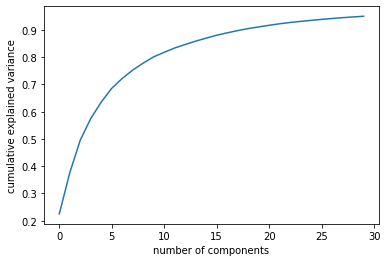

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was:',data1.shape,'the new shape is :',pca_data1.shape)

the initial shape was: (2000, 216) the new shape is : (2000, 30)


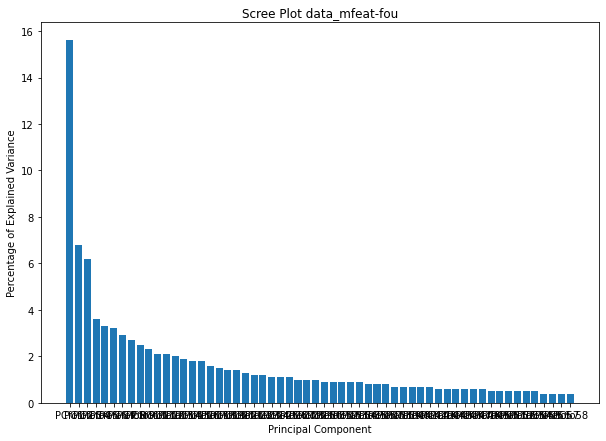

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data2)
pca_data2=pca.transform(scaled_data2)
pca_data2=pd.DataFrame(pca_data2, columns=['PCfo_'+str(i) for i in range(pca_data2.shape[1])])
per_var_data2=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCfo'+str(x) for x in range(1,len(per_var_data2)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data2)+1),height=per_var_data2, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-fou')
plt.show()

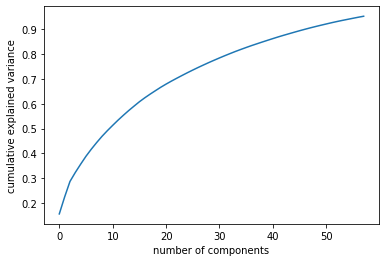

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was:',data2.shape,'the new shape is :',pca_data2.shape)

the initial shape was: (2000, 76) the new shape is : (2000, 58)


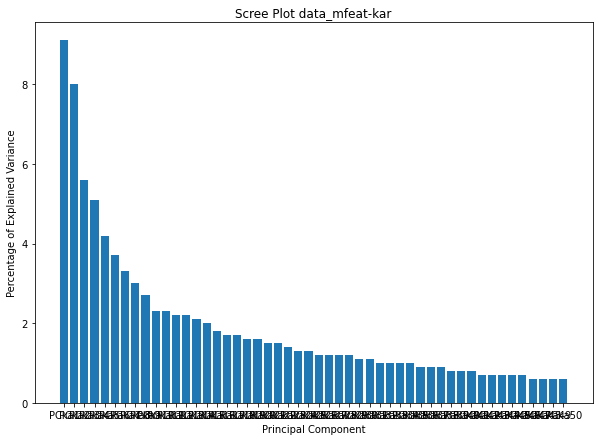

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data3)
pca_data3=pca.transform(scaled_data3)
pca_data3=pd.DataFrame(pca_data3, columns=['PCka_'+str(i) for i in range(pca_data3.shape[1])])
per_var_data3=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCka'+str(x) for x in range(1,len(per_var_data3)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data3)+1),height=per_var_data3, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-kar')
plt.show()

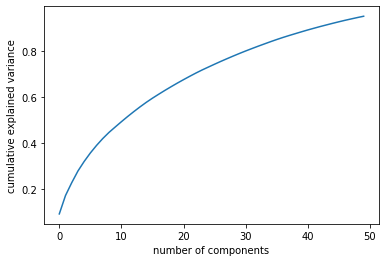

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was',data3.shape,'the new shape is',pca_data3.shape)

the initial shape was (2000, 64) the new shape is (2000, 50)


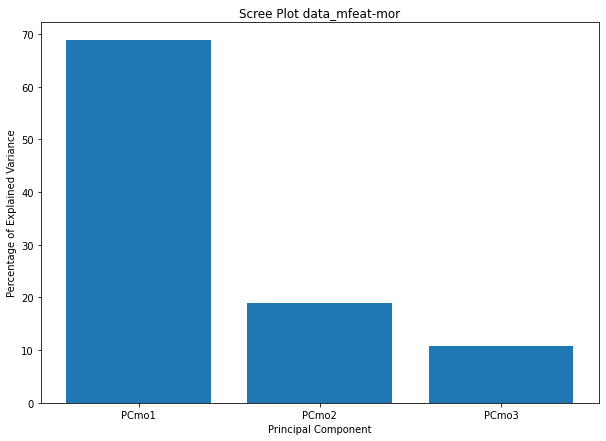

In [ ]:
pca=PCA(.95)
pca.fit(scaled_data4)
pca_data4=pca.transform(scaled_data4)
pca_data4=pd.DataFrame(pca_data4, columns=['PCmo_'+str(i) for i in range(pca_data4.shape[1])])
per_var_data4=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCmo'+str(x) for x in range(1,len(per_var_data4)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data4)+1),height=per_var_data4, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-mor')
plt.show()

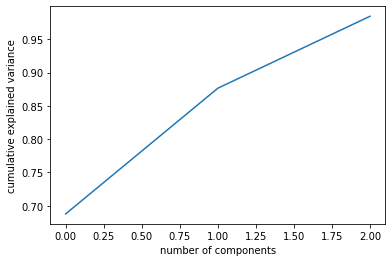

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was',data4.shape,'the new shape is',pca_data4.shape)

the initial shape was (2000, 6) the new shape is (2000, 3)


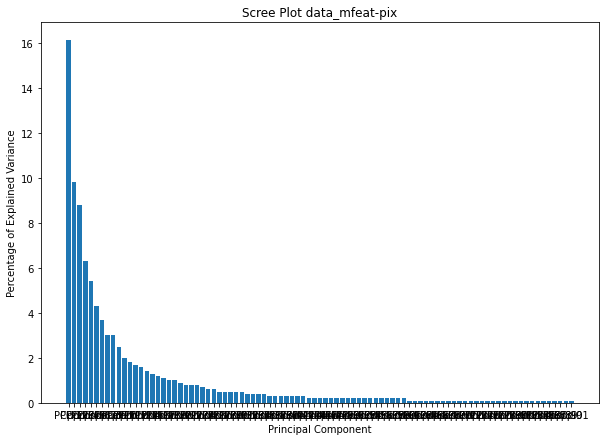

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data5)
pca_data5=pca.transform(scaled_data5)
pca_data5=pd.DataFrame(pca_data5, columns=['PCpi_'+str(i) for i in range(pca_data5.shape[1])])
per_var_data5=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCpi'+str(x) for x in range(1,len(per_var_data5)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data5)+1),height=per_var_data5, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-pix')
plt.show()

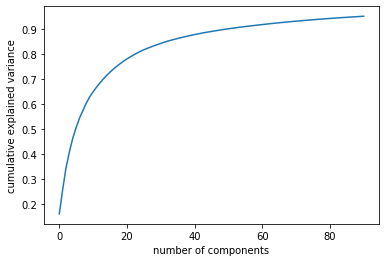

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was',data5.shape,'the new shape is',pca_data5.shape)

the initial shape was (2000, 240) the new shape is (2000, 91)


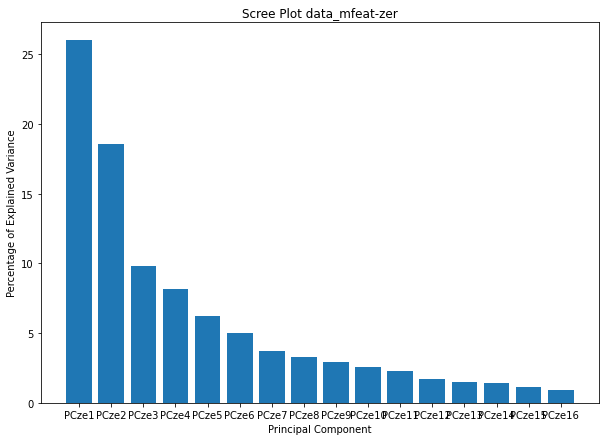

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data6)
pca_data6=pca.transform(scaled_data6)
pca_data6=pd.DataFrame(pca_data6, columns=['PCze_'+str(i) for i in range(pca_data6.shape[1])])
per_var_data6=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCze'+str(x) for x in range(1,len(per_var_data6)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data6)+1),height=per_var_data6, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-zer')
plt.show()

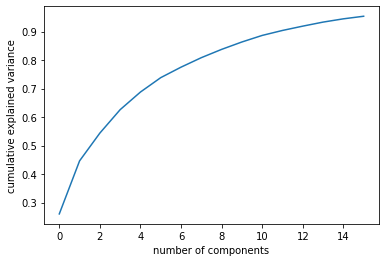

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was',data6.shape,'the new shape is',pca_data6.shape)

the initial shape was (2000, 47) the new shape is (2000, 16)


In [ ]:
PCA_frames = [pca_data1, pca_data2,pca_data3,pca_data4,pca_data5,pca_data6]
  
PCA_result = pd.concat(PCA_frames,axis=1,join='inner')
print('the shape of the merge of all the PCA dataset is:',PCA_result.shape)

the shape of the merge of all the PCA dataset is: (2000, 248)


In [ ]:
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(PCA_result)
labels = k_means.labels_
import numpy
lst=0
p=0
new=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(labels[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=labels[i:i+200]
  a=np.bincount(labels[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new.append(v[j])
  p+=1
label_new1=np.array(new)

In [ ]:
print('the accurancy for the first method is:',accuracy_score(true_label, label_new1))

the accurancy for the first method is: 0.92


In [ ]:
print('the adjusted_rand_score is:',adjusted_rand_score(true_label, labels))

the adjusted_rand_score is: 0.8640814339475328


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


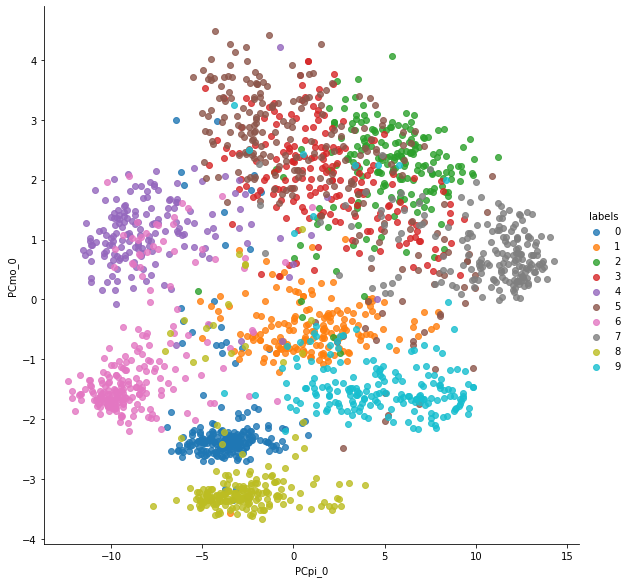

In [ ]:
import seaborn as sns
PCA_result ['labels']=label_new1
#plot data with seaborn
facet = sns.lmplot(data=PCA_result, x='PCpi_0', y='PCmo_0', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=8)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
col=PCA_result.columns
cluster.fit_predict(PCA_result[col[:-1]])
labels11 = cluster.labels_
(unique, counts) = numpy.unique(labels11, return_counts=True)
frequencies = numpy.asarray( (unique,counts))
print(frequencies)

[[   0]
 [2000]]


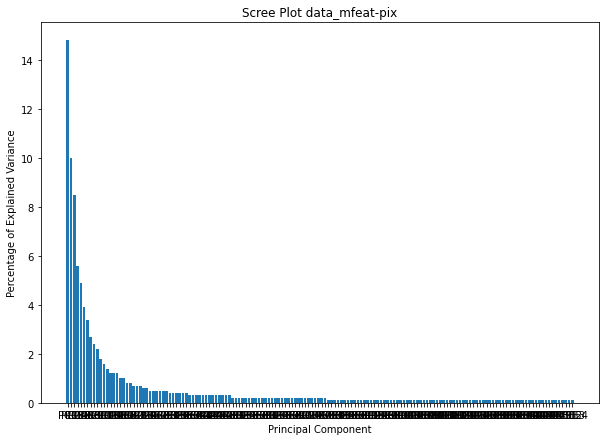

In [ ]:
scaled_result = scaler.fit_transform(result)
scaled_result = pd.DataFrame(scaled_result, columns=result.columns)
pca=PCA(0.95)
pca.fit(scaled_result)
pca_result2=pca.transform(scaled_result)
pca_result2=pd.DataFrame(pca_result2, columns=['PC'+str(i) for i in range(pca_result2.shape[1])])
per_var_result=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var_result)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_result)+1),height=per_var_result, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-pix')
plt.show()

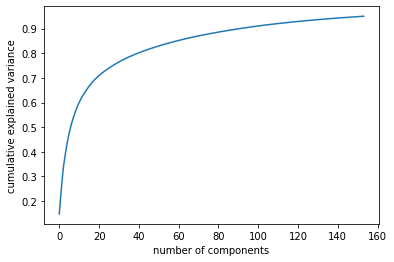

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('the initial shape was',result.shape,'the new shape is',pca_result2.shape)

the initial shape was (2000, 649) the new shape is (2000, 154)


In [ ]:
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_result2)
labels2 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(labels2[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=labels2[i:i+200]
  a=np.bincount(labels2[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new2=np.array(new2)

In [ ]:
print('the accurancy is:',accuracy_score(true_label, label_new2))

the accurancy is: 0.927


In [ ]:
print('the adjusted_rand_score is:',adjusted_rand_score(true_label, labels2))

the accurancy is: 0.822304484762494


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


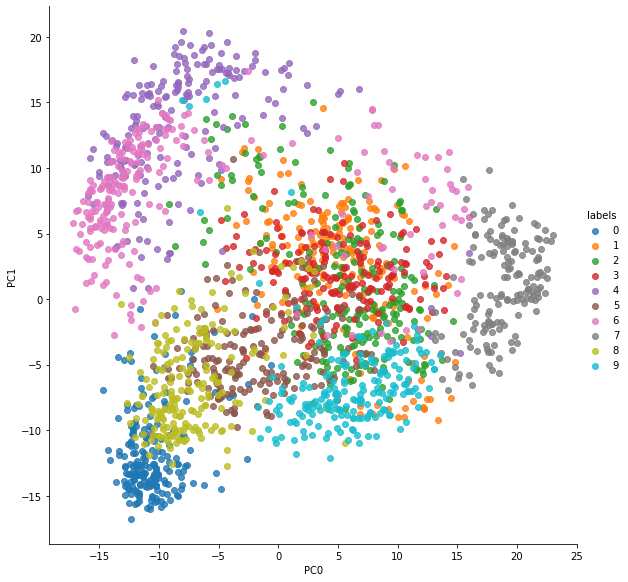

In [ ]:
pca_result2 ['labels']=label_new2
#plot data with seaborn
facet = sns.lmplot(data=pca_result2, x='PC0', y='PC1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=8,)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
col=pca_result2.columns
cluster.fit_predict(pca_result2[col[:-1]])
labels12 = cluster.labels_
(unique, counts) = numpy.unique(labels12, return_counts=True)
frequencies = numpy.asarray( (unique,counts))
print(frequencies)

[[   0    1]
 [ 809 1191]]


In [ ]:
(unique, counts) = numpy.unique(labels2, return_counts=True)
frequencies = numpy.asarray( (unique,counts))
print(frequencies)

[[  0   1   2   3   4   5   6   7   8   9]
 [207 199 228 191 196 185 240 162 199 193]]


In [ ]:
pca_data3

,PCka_0,PCka_1,PCka_2,PCka_3,PCka_4,PCka_5,PCka_6,PCka_7,PCka_8,PCka_9,PCka_10,PCka_11,PCka_12,PCka_13,PCka_14,PCka_15,PCka_16,PCka_17,PCka_18,PCka_19,PCka_20,PCka_21,PCka_22,PCka_23,PCka_24,PCka_25,PCka_26,PCka_27,PCka_28,PCka_29,PCka_30,PCka_31,PCka_32,PCka_33,PCka_34,PCka_35,PCka_36,PCka_37,PCka_38,PCka_39,PCka_40,PCka_41,PCka_42,PCka_43,PCka_44,PCka_45,PCka_46,PCka_47,PCka_48,PCka_49
0,0.650578,-0.795976,1.355702,-1.148324,1.371941,0.203682,-0.018499,-0.069188,0.528946,0.185767,-1.385458,0.189302,2.468119,0.187700,0.317832,0.101076,-1.011532,0.068169,-2.067912,-0.019927,-0.063128,-1.902652,-0.389249,1.502736,-1.404719,0.234652,0.167907,1.789675,-0.290897,-1.644602,-0.286911,1.206471,0.751010,-0.890230,-0.058853,-0.568088,0.788965,-0.238319,-0.415394,0.127160,1.074393,-0.513775,0.309894,0.426304,-1.033582,1.139901,0.082254,0.375837,0.054060,-0.721037
1,2.011860,-0.264211,0.312986,-2.108408,3.106223,1.442624,0.215272,-0.548686,0.448643,-0.902511,1.194850,-0.971916,1.256145,-2.036581,0.289485,-0.998713,-0.316947,1.258796,-0.613794,-0.317056,0.635919,0.149689,-0.233615,-0.402239,-0.555617,-1.126972,-0.329596,-0.284630,-0.362806,-2.090008,0.700615,-0.232695,1.626965,-0.737401,1.985898,-1.497122,-0.010007,-0.718658,-0.247490,1.515823,-1.098710,0.548104,-0.179104,-0.871359,-0.716809,0.198526,0.084508,-0.558502,0.499095,-0.507812
2,-1.913898,-1.294954,0.164031,-2.476610,1.383621,-1.143549,1.897732,-0.522519,-0.486607,0.557894,1.272380,-0.570252,1.311135,-0.048057,0.313940,-1.787998,1.163500,0.595703,-1.562588,-0.532938,-2.267048,-0.327405,-0.086089,0.472411,-0.008788,0.046675,0.925344,0.147518,-0.413373,1.276624,0.243308,0.487038,2.543369,0.940658,1.222244,0.200136,1.242933,0.892071,0.956111,-0.275034,0.402737,-1.041778,1.425730,-0.079760,-0.594252,1.142472,0.614559,-0.144531,-0.346498,0.525207
3,-0.164340,-2.210302,2.046110,-1.221456,0.196467,-1.439472,0.291917,-2.096124,0.774848,0.023451,1.500989,0.274710,2.521553,-1.421067,1.616387,0.224765,-1.137617,-0.509433,0.274330,0.527142,0.329889,0.516468,-0.585138,-0.345468,0.969603,0.321112,-0.830600,-0.258766,-0.020795,-0.304335,-0.359593,-1.121626,-0.412123,1.031777,-0.122756,-0.660867,-0.338121,-0.585898,-0.824677,-0.354059,0.869880,-0.500082,-0.934279,-0.096426,-0.028245,-0.354636,0.483471,-0.487344,0.312422,0.764391
4,4.020279,-0.435998,0.710938,-1.252845,1.838018,2.326837,0.280597,0.100776,0.892134,1.258023,-0.663132,0.189159,2.280524,-1.924808,-1.227840,-0.156074,0.716872,-1.013787,-0.678422,0.721722,0.773431,-0.625703,0.610868,-0.253702,-0.114861,0.349109,0.519700,0.560661,0.754077,-0.599449,1.088947,-1.791614,1.668133,0.063596,0.960696,0.225138,0.460004,-0.636510,0.223795,0.249038,-0.183356,0.042727,0.731841,-1.062945,0.377345,-1.372990,0.969137,-0.690270,1.049843,0.217507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2.913113,1.463578,-0.763174,-1.459326,0.657108,-0.227564,0.543579,-0.240400,0.856187,0.730801,-1.964973,3.179481,0.139607,0.661010,0.067320,1.428403,1.126724,-0.983827,-0.732845,1.427056,0.649644,1.835910,-0.065239,-0.049507,-0.356842,0.453656,0.802967,1.127878,0.685156,0.620355,0.879508,-0.222432,-0.137184,0.921904,-0.777544,0.123622,-0.081116,-0.416285,0.008962,-0.519595,-0.107030,-0.002853,0.913829,-0.065706,1.099072,0.174418,-0.546921,-0.742471,0.052742,0.424439
1996,-0.592313,0.252305,1.179378,0.098490,1.584217,1.366774,0.172419,-1.551906,0.691512,-0.898829,-0.917620,-0.646561,0.345609,-1.128672,-0.905272,-1.601164,-2.999737,1.550145,1.921973,0.544318,-0.693830,2.018581,-0.309428,-0.641549,-0.257980,-0.668712,0.532469,-0.003115,1.349825,-2.135035,1.362879,-1.157935,-0.193205,-0.109326,-0.652979,-0.629022,0.378451,0.379943,-0.489783,0.074530,0.537132,-0.055533,-1.578209,0.646479,-0.228972,-0.285676,0.409985,0.526575,-1.537499,0.039462
1997,-3.892526,1.034676,0.432322,-2.067456,2.401797,0.520463,-1.

In [ ]:
Lab= pd.DataFrame(scaled_result, columns=result.columns)

In [ ]:
LAB=np.transpose([true_label, label_new1,label_new2])
LAB1=pd.DataFrame(LAB,columns=['true_label','label_new1','label_new2'])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print('the accurancy is:',adjusted_rand_score(true_label, labels2))

the accurancy is: 0.8451932091753689


In [ ]:
LAB1.sample(20)

,true_label,label_new1,label_new2
338,1,1,1
391,1,1,1
4,0,0,0
515,2,2,2
127,0,0,0
1213,6,8,0
1273,6,6,6
1036,5,5,5
39,0,0,0
958,4,6,4
